<a href="https://colab.research.google.com/github/r3dkoi/CST182/blob/main/Tutorial_8_Pandas_%26_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUTORIAL 8 - WORKING WITH DATA**

In this tutorial, we will be revise the main topics covered in working with data - namely the Pandas & matplotlib modules.

> **Note:** *For a comprehensive understanding please refer to the materials on the LMS*

# **#1. Pandas** | Manipulating Data


Here we will recap how to use Pandas to be able to import and manipulate data within Python.

## **1.1 Importing**
---

As Pandas is an external module, you will need to import it

In [ ]:
import pandas as pd

>**Note:** *Pandas is typically imported as `pd` for short to make it easier to work with - this is not required though.*
<br/>

## **1.2 Series**
---

`Series` are a 1 dimension data structure with an index. They are not heavily used but they are listed here for completeness

In [ ]:
# LIST
list_ex = [15, 32, 94, 22, 12]
print("List Example: ")
print(list_ex)

print()

# SERIES (based on list)
series_ex = pd.Series(list_ex)
print("Pandas Series Example:")
print(series_ex)

List Example: 
[15, 32, 94, 22, 12]

Pandas Series Example:
0    15
1    32
2    94
3    22
4    12
dtype: int64


<br/><br/>

## **1.3 DataFrames**
---

<br/>

`DataFrames` are the main data structure used in Pandas, and are formed via rows (records) and columns (attributes).

<br/>

### 1.3.1 **Reading in a CSV**

We can read a CSV file into a DataFram via the Pandas method ``read_csv()``

In [ ]:
df = pd.read_csv("nobel_final.csv")

### 1.3.2 **Checking Data**

We can quickly check the data we are working with by using the ``head()`` method

In [ ]:
df.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


### 1.3.3 **Selecting Data**

We can select data by providing some additional information as follows

#### **Based on Columns**

>##### **Single Column**

In [ ]:
print(df["year"])

0      1901
1      1902
2      1902
3      1903
4      1903
       ... 
918    2019
919    2019
920    2019
921    2019
922    2019
Name: year, Length: 923, dtype: int64


>##### **Multiple Columns**

In [ ]:
print(df[["year","age"]])

     year  age
0    1901   78
1    1902   75
2    1902   78
3    1903   56
4    1903   47
..    ...  ...
918  2019   78
919  2019   44
920  2019   59
921  2019   48
922  2019   56

[923 rows x 2 columns]


#### **Based on Conditions**

We can use normal Python conditions to be able to filter the data that we want to display.

Take for example, only looking at Noble Prize winners from 1990 or later.

In [ ]:
print(df[df["year"] >= 1990].head())

         firstname    surname born_country_code died_country_code gender  \
137      Jerome I.   Friedman                US               NaN   male   
138       Henry W.    Kendall                US                US   male   
139     Richard E.     Taylor                CA                US   male   
140  Pierre-Gilles  de Gennes                FR                FR   male   
141        Georges    Charpak                PL                FR   male   

     year category  share                           name_of_university  \
137  1990  physics      3  Massachusetts Institute of Technology (MIT)   
138  1990  physics      3  Massachusetts Institute of Technology (MIT)   
139  1990  physics      3                          Stanford University   
140  1991  physics      1                            Collège de France   
141  1992  physics      1       École Supérieure de Physique et Chimie   

    city_of_university country_of_university born_month  age  age_get_prize  
137       Cambridge 

### 1.3.4 **Filtering (selected data) into a new DataFrame**

We can filter data into a new DataFrame by simply filtering the data and then assigning it to a variable.

This new variable can be used like a normal DataFrame

In [ ]:
cutdf = df[["category", "gender", "age", "share","year"]]

print(cutdf)

       category  gender  age  share  year
0       physics    male   78      1  1901
1       physics    male   75      2  1902
2       physics    male   78      2  1902
3       physics    male   56      2  1903
4       physics    male   47      4  1903
..          ...     ...  ...    ...   ...
918  literature    male   78      1  2019
919       peace    male   44      1  2019
920   economics    male   59      3  2019
921   economics  female   48      3  2019
922   economics    male   56      3  2019

[923 rows x 5 columns]


<br/>

### **1.4 Aggregate Statistics**

#### 1.4.1 **Basic**

We can get simple aggregate statistics via apply methods (`mean()`) on a DataFrame

In [ ]:
print(cutdf.mean())

age        79.346696
share       2.020585
year     1971.102925
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
print(cutdf["age"].mean())

79.34669555796316


#### 1.4.2 **Advanced**

In [ ]:
print(cutdf["age"].aggregate(['count','mean','min','max','average']))

count      923.000000
mean        79.346696
min         23.000000
max        103.000000
average     79.346696
Name: age, dtype: float64


<br/>

#### 1.4.3 **Grouping**

We can perform aggregate methods based on different groups within the data via the `groupby()` method.

##### via ***Single Column***

In [ ]:
print(cutdf.groupby(["category"]).mean())

                  age     share         year
category                                    
chemistry   78.934783  2.108696  1972.347826
economics   81.630952  1.952381  1996.119048
literature  78.948276  1.068966  1960.931034
medicine    80.223744  2.378995  1970.356164
peace       75.700935  1.579439  1961.953271
physics     79.948357  2.342723  1971.065728


##### via ***Multiple Columns***

In [ ]:
print(cutdf.groupby(["category","gender"]).mean())

                         age     share         year
category   gender                                  
chemistry  female  71.000000  1.800000  1967.400000
           male    79.156425  2.117318  1972.486034
economics  female  63.500000  2.500000  2014.000000
           male    82.073171  1.939024  1995.682927
literature female  77.600000  1.066667  1977.200000
           male    79.148515  1.069307  1958.514851
medicine   female  77.250000  2.750000  1994.583333
           male    80.396135  2.357488  1968.951691
peace      female  66.764706  1.823529  1985.117647
           male    77.388889  1.533333  1957.577778
physics    female  64.666667  4.000000  1961.333333
           male    80.166667  2.319048  1971.204762


# **#2. Matplotlib** | Visualising Data
---

<br/>

Here we will recap how to use matplotlib to plot data on a graph

### **2.1 Basics**

First we will need to import the external module

In [ ]:
import matplotlib.pyplot as plt

Next, we can simply use the maplotlib (as ``plt``)'s method ``scatter()`` to plot the x and y axis from our Pandas DataFrame as follows:

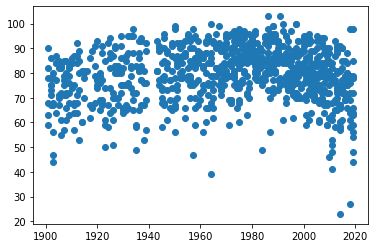

In [ ]:
plt.scatter(df["year"], cutdf["age"])
plt.show()

Next, we will add some extra informaiton to the graph such as the title and labels for the X and Y axes.


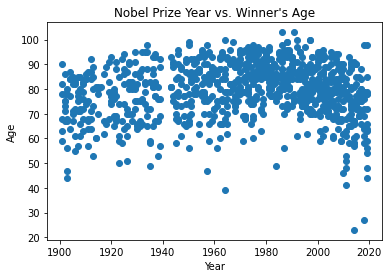

In [ ]:
plt.title("Nobel Prize Year vs. Winner's Age")

plt.xlabel("Year")
plt.ylabel("Age")

plt.scatter(df["year"], cutdf["age"])
plt.show()

# **Your Turn**
---
Use your knowledge of Pandas to work out the following:

https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

### **Task 1 |** Pandas: Opening files and Data Manipulation


In [1]:
# Student Name:   Kyla Sofocado
# Student Number: 1034672

import pandas as pd

# TODO: read the csv into a DataFrame and then fill in each print statement
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(df.head()) #debug statement + checking data we're working with


#Finding the ratio of male to females  [Selection of Data]
"""This filters specifically the males and females from the dataset"""
male_count = df['Sex'] == 'male'
female_count = df['Sex'] == 'female'
ratio_m_and_f = round((male_count.sum() / female_count.sum()),1)

#Finding the number of people per class [1, 2, 3 class] [Groupby() method practice]
people_per_class = df.groupby('Pclass').size()

#Finding the mean, max, min, and count of people per class [Groupby() method - mean,max,min practice]
    # Calculate the aggregation of the data
average_per_class = df.groupby('Pclass').size().mean()
maximum_per_class = df.groupby('Pclass').size().max()
minimum_per_class = df.groupby('Pclass').size().min()

#Calculate the number of males and females per class using existing variables
"""This filters specifically males and females only from the Per Class Category"""
male_count_per_class = df[male_count].groupby('Pclass').size()
female_count_per_class = df[female_count].groupby('Pclass').size()

#Calculating the rest of the aggregations for males and females per class
average_males_per_class = df[male_count].groupby('Pclass').size().mean()
average_females_per_class = df[female_count].groupby('Pclass').size().mean()
maximum_males_per_class = df[male_count].groupby('Pclass').size().max()
maximum_females_per_class = df[female_count].groupby('Pclass').size().max()
minimum_males_per_class = df[male_count].groupby('Pclass').size().min()
minimum_females_per_class = df[female_count].groupby('Pclass').size().min()


#Display section
print(f"\n1. The number of people aboard was {len(df)}")
print(f"\n2. The ratio of male to females passengers on board were: {ratio_m_and_f}")
print(f"\n3. Number of people in each class: ")
for pclass, count in people_per_class.items():
    print(f"   Class {pclass} = {count} people")
print(f"\n4. The average amount of people per class was: {average_per_class:.1f}")
print(f"\n5. The maximum amount of people per class was: {maximum_per_class}")
print(f"\n6. The minimum amount of people per class was: {minimum_per_class}")

print(f"\n7. The total count of males per class were: ")
for pclass, count in male_count_per_class.items():
    print(f"   Class {pclass} = {count} males")
print(f"\n8. The average amount of males per class were: {average_males_per_class:.1f}")
print(f"\n9. The maximum amount of males per class were: {maximum_males_per_class}")
print(f"\n10. The minimum amount of males per class were: {minimum_males_per_class}")

print(f"\n11. The total count of females per class were: ")
for pclass, count in female_count_per_class.items():
    print(f"   Class {pclass} = {count} females")
print(f"\n12. The average amount of females per class were: {average_females_per_class:.1f}")
print(f"\n13. The maximum amount of females per class were: {maximum_females_per_class}")
print(f"\n14. The minimum amount of females per class were: {minimum_females_per_class}")











   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

1

### **Task 2 |** MatPlotLib: Plotting Data

Import matplotlib and plot age compared to fare

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


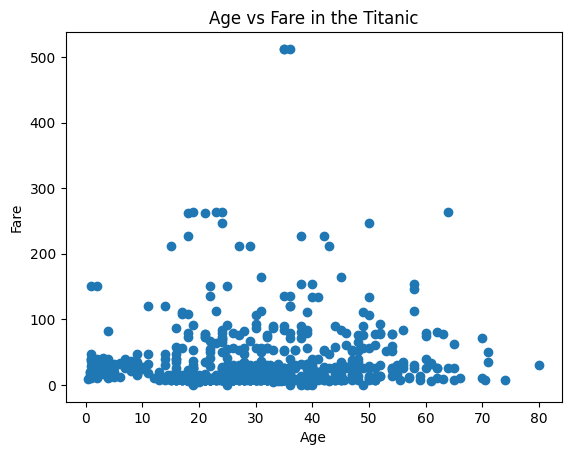

In [2]:
"""A scatter plot to plot age compared to fare"""
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# TODO: Create a scatter plot comparing the age of each person to the fare they paid
print(df2.head()) #Debug statement to show if the data is being read correctly.


plt.scatter(df2["Age"], df2["Fare"])

#Labelling the graph
plt.title("Age vs Fare in the Titanic")

plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

